In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('educ_inc.csv')
df

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
0,1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1,1/1/08 0:00,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
2,1/1/08 0:00,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
3,1/1/08 0:00,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981
4,1/1/08 0:00,00 to 17,Female,No high school diploma,"D: 15,000 to 24,999",2009
...,...,...,...,...,...,...
1021,1/1/14 0:00,18 to 64,Female,High school or equivalent,"A: 0 to 4,999",670294
1022,1/1/14 0:00,18 to 64,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,1/1/14 0:00,18 to 64,Female,No high school diploma,"A: 0 to 4,999",723208
1024,1/1/14 0:00,18 to 64,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


# First Question

###  1. Group the table by Educational Attainment and sum the Population Count in each category(2).

In [4]:
df.groupby(by = 'Educational Attainment').sum()

/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_31663/3077933478.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by = 'Educational Attainment').sum()


,Population Count
Educational Attainment,
Bachelor's degree or higher,54617676
"College, less than 4-yr degree",52137494
High school or equivalent,42942926
No high school diploma,40668871


### 2. Analyse the percentage distribution of educational attainment among adult Californians(2).

In [6]:
df['Age'].value_counts()

18 to 64     448
65 to 80+    444
00 to 17     134
Name: Age, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
0,1/1/08 0:00,0,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1,1/1/08 0:00,0,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
2,1/1/08 0:00,2,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
3,1/1/08 0:00,2,Female,No high school diploma,"H: 75,000 and over",1981
4,1/1/08 0:00,0,Female,No high school diploma,"D: 15,000 to 24,999",2009
...,...,...,...,...,...,...
1021,1/1/14 0:00,1,Female,High school or equivalent,"A: 0 to 4,999",670294
1022,1/1/14 0:00,1,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,1/1/14 0:00,1,Female,No high school diploma,"A: 0 to 4,999",723208
1024,1/1/14 0:00,1,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


In [9]:
df_adult = df[df['Age']>=1]

In [10]:
df_adult

,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
2,1/1/08 0:00,2,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
3,1/1/08 0:00,2,Female,No high school diploma,"H: 75,000 and over",1981
9,1/1/08 0:00,1,Female,No high school diploma,"H: 75,000 and over",4233
11,1/1/08 0:00,2,Male,No high school diploma,"H: 75,000 and over",5801
16,1/1/08 0:00,2,Female,No high school diploma,"F: 35,000 to 49,999",8109
...,...,...,...,...,...,...
1021,1/1/14 0:00,1,Female,High school or equivalent,"A: 0 to 4,999",670294
1022,1/1/14 0:00,1,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,1/1/14 0:00,1,Female,No high school diploma,"A: 0 to 4,999",723208
1024,1/1/14 0:00,1,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


In [16]:
obj = pd.DataFrame(df_adult.groupby('Educational Attainment')['Population Count'].sum())

In [18]:
obj

,Population Count
Educational Attainment,
Bachelor's degree or higher,54603003
"College, less than 4-yr degree",52045952
High school or equivalent,42828045
No high school diploma,31102348


In [20]:
s = obj['Population Count'].sum()
print(s)
obj['Percentage Distribution']= obj['Population Count']/s

180579348


In [21]:
obj

,Population Count,Percentage Distribution
Educational Attainment,,
Bachelor's degree or higher,54603003,0.302377
"College, less than 4-yr degree",52045952,0.288217
High school or equivalent,42828045,0.237170
No high school diploma,31102348,0.172236


In [22]:
obj['Percentage Distribution']

Educational Attainment
Bachelor's degree or higher       0.302377
College, less than 4-yr degree    0.288217
High school or equivalent         0.237170
No high school diploma            0.172236
Name: Percentage Distribution, dtype: float64

### 3. Using pivot , get a contingency table (a table of counts) of adult Californians cross-classified by Educational Attainment and Personal Income(2).

In [75]:
contingency_table = pd.pivot_table(df, index='Educational Attainment', columns='Personal Income', aggfunc='count', fill_value=0)
print(contingency_table)

                                         Age                    \
Personal Income                A: 0 to 4,999 B: 5,000 to 9,999   
Educational Attainment                                           
Bachelor's degree or higher               30                28   
College, less than 4-yr degree            36                35   
High school or equivalent                 35                36   
No high school diploma                    42                42   

                                                                        \
Personal Income                C: 10,000 to 14,999 D: 15,000 to 24,999   
Educational Attainment                                                   
Bachelor's degree or higher                     29                  30   
College, less than 4-yr degree                  34                  36   
High school or equivalent                       33                  32   
No high school diploma                          42                  39   

                  

# Second Question

### 4.List those NBA players who earned more than 10m USD(2).

In [24]:
nba_df = pd.read_csv('nba_salaries.csv')

In [25]:
nba_df

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
2,Tiago Splitter,C,Atlanta Hawks,9.756250
3,Jeff Teague,PG,Atlanta Hawks,8.000000
4,Kyle Korver,SG,Atlanta Hawks,5.746479
...,...,...,...,...
412,Gary Neal,PG,Washington Wizards,2.139000
413,DeJuan Blair,C,Washington Wizards,2.000000
414,Kelly Oubre Jr.,SF,Washington Wizards,1.920240
415,Garrett Temple,SG,Washington Wizards,1.100602


In [27]:
nba_df[nba_df['SALARY']>10]

,PLAYER,POSITION,TEAM,SALARY
0,Paul Millsap,PF,Atlanta Hawks,18.671659
1,Al Horford,C,Atlanta Hawks,12.000000
29,Joe Johnson,SF,Brooklyn Nets,24.894863
30,Thaddeus Young,PF,Brooklyn Nets,11.235955
42,Al Jefferson,C,Charlotte Hornets,13.500000
...,...,...,...,...
368,DeMar DeRozan,SG,Toronto Raptors,10.050000
383,Gordon Hayward,SF,Utah Jazz,15.409570
400,John Wall,PG,Washington Wizards,15.851950
401,Nene Hilario,C,Washington Wizards,13.000000


In [30]:
nba_df[nba_df['SALARY']>10]['PLAYER']

0        Paul Millsap
1          Al Horford
29        Joe Johnson
30     Thaddeus Young
42       Al Jefferson
            ...      
368     DeMar DeRozan
383    Gordon Hayward
400         John Wall
401      Nene Hilario
402     Marcin Gortat
Name: PLAYER, Length: 69, dtype: object

### 5.How much money did each team pay for its players' salaries(2)? 

In [32]:
nba_df['TEAM'].value_counts()

Memphis Grizzlies         21
Charlotte Hornets         18
Washington Wizards        17
Utah Jazz                 17
Toronto Raptors           17
Phoenix Suns              17
Oklahoma City Thunder     16
New Orleans Pelicans      16
Boston Celtics            15
Portland Trail Blazers    14
Orlando Magic             14
Atlanta Hawks             14
Denver Nuggets            14
Golden State Warriors     14
Brooklyn Nets             13
San Antonio Spurs         13
Philadelphia 76ers        13
New York Knicks           13
Los Angeles Clippers      13
Minnesota Timberwolves    13
Milwaukee Bucks           13
Indiana Pacers            13
Houston Rockets           12
Chicago Bulls             12
Miami Heat                12
Los Angeles Lakers        11
Dallas Mavericks          11
Sacramento Kings          11
Detroit Pistons           10
Cleveland Cavaliers       10
Name: TEAM, dtype: int64

In [31]:
nba_df.groupby('TEAM').sum()

/var/folders/21/yhy2dhmx219b7cbcq243hmwc0000gn/T/ipykernel_31663/670969577.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nba_df.groupby('TEAM').sum()


,SALARY
TEAM,
Atlanta Hawks,69.573103
Boston Celtics,50.285499
Brooklyn Nets,57.306976
Charlotte Hornets,84.102397
Chicago Bulls,78.820890
Cleveland Cavaliers,102.312412
Dallas Mavericks,65.762559
Denver Nuggets,62.429404
Detroit Pistons,42.211760


# Third Question

### 6.	Locate the first tuple corresponding to the last 3 digits of your Roll No, and check if the income is above 50K(1)

In [35]:
test_df = pd.read_csv('test1.csv')

In [36]:
test_df

,Unnamed: 0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [41]:
me = pd.DataFrame(test_df.iloc[461])

In [42]:
me

,461
Unnamed: 0,461
39,32
State-gov,Private
77516,132601
Bachelors,Bachelors
13,13
Never-married,Married-civ-spouse
Adm-clerical,Prof-specialty
Not-in-family,Husband
White,White


In [43]:
type(me)

pandas.core.frame.DataFrame

In [45]:
me.iloc[-1]

461     <=50K
Name:  <=50K, dtype: object

### 7.Rename the columns as follows:[‘Srl No’, 'age', 'type_employer', 'fnlwgt','education', 'education_num','marital','occupation','relationship','race','sex','capital_gain', capital_loss', 'hr_per_week', 'country', 'income'] (1)

In [52]:
test_df.columns = ['Srl No', 'age', 'type_employer', 'fnlwgt','education', 'education_num','marital','occupation','relationship','race','sex','capital_gain', 'capital_loss', 'hr_per_week', 'country', 'income']

In [53]:
test_df

,Srl No,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### 8.Analyse the proportion of high income professionals (>=50K) in the database (1).

In [58]:
obj = pd.DataFrame(test_df['income'].value_counts())

In [59]:
obj

,income
<=50K,24719
>50K,7841


In [63]:
obj.iloc[0]/obj.iloc[1]

income    3.152532
dtype: float64

### 9.Find the skew and kurtosis in terms of age(1).

In [64]:
test_df['age'].kurtosis()

-0.166212226734332

In [65]:
test_df['age'].skew()

0.5587376395152729

### 10.Find the average age, and standard deviation for female population

In [68]:
test_df['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

In [77]:
test_df[test_df['sex']=='Male']

,Srl No,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income


### 12.Draw a histogram for age of men. Histogram should be step-filled with bin of size 20. Find the skew of this distribution, and comment if it is positive or negative(2).

In [69]:
import seaborn as sns

<Axes: >

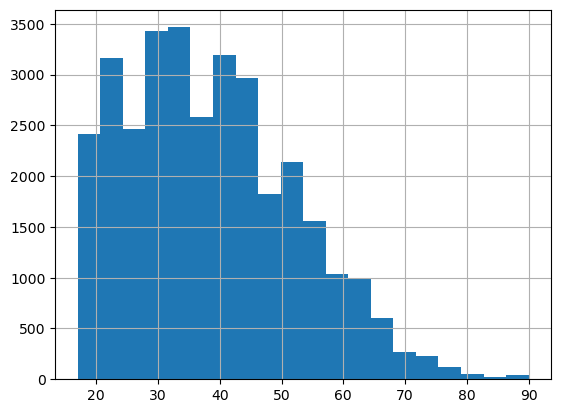

In [71]:
test_df['age'].sort_values().hist(bins=20)

In [72]:
test_df['age'].skew()

0.5587376395152729

###  Draw a Box Plot of "age" vs "income

{'whiskers': [<matplotlib.lines.Line2D at 0x151311b10>,
 'caps': [<matplotlib.lines.Line2D at 0x15132a490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1513100d0>],
 'medians': [<matplotlib.lines.Line2D at 0x15132b590>],
 'fliers': [<matplotlib.lines.Line2D at 0x1512f20d0>],
 'means': []}

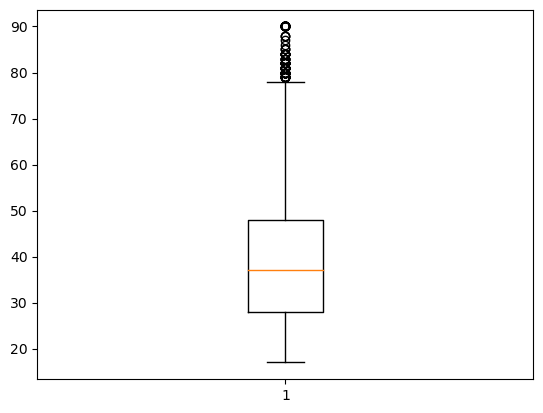

In [74]:
plt.boxplot(test_df['age'])